# 1. 身麼是分類問題
## (1). 二元分類
- can you calssify people what will buy the computer and the other?

| age   | income | student | credit_rating | buys_computer |
|-------|--------|---------|---------------|---------------|
| <=30  | high   | no      | fair          | no            |
| <=30  | high   | no      | excellent     | no            |
| 30…40 | high   | no      | fair          | yes           |
| >40   | medium | no      | fair          | yes           |
| >40   | low    | yes     | fair          | yes           |
| >40   | low    | yes     | excellent     | no            |
| 31…40 | low    | yes     | excellent     | yes           |
| <=30  | medium | no      | fair          | no            |
| <=30  | low    | yes     | fair          | yes           |
| >40   | medium | yes     | fair          | yes           |
| <=30  | medium | yes     | excellent     | yes           |
| 31…40 | medium | no      | excellent     | yes           |
| 31…40 | high   | yes     | fair          | yes           |
| >40   | medium | no      | excellent     | no            |


- 問題對中的兩個問題是否問的是同一件事情?

| id | qid1 | qid2 | question1                                                                              | question2                                                                                  | is_duplicate |
|----|------|------|----------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------|--------------|
| 0  | 1    | 2    | What is the step by step guide to invest in share market in india?                     | What is the step by step guide to invest in share market?                                  | 0            |
| 1  | 3    | 4    | What is the story of Kohinoor (Koh-i-Noor) Diamond?                                    | What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?   | 0            |
| 2  | 5    | 6    | How can I increase the speed of my internet connection while using a VPN?              | How can Internet speed be increased by hacking through DNS?                                | 0            |
| 3  | 7    | 8    | Why am I mentally very lonely? How can I solve it?                                     | Find the remainder when [math]23^{24}[/math] is divided by 24,23?                          | 0            |
| 4  | 9    | 10   | Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?           | Which fish would survive in salt water?                                                    | 0            |
| 5  | 11   | 12   | Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me? | I'm a triple Capricorn (Sun, Moon and ascendant in Capricorn) What does this say about me? | 1            |


- 分類出是貓的圖片

![catImgs](./imgs/catImgs.JPG)

## (1). 多元分類
- 新聞分類
- 電影分類

# 2. 演算法們
1. Decision Tree (決策樹)
2. Naïve Bayes (貝氏分類器)
3. Logistic Regression (羅吉斯回歸)
4. K Nearest Neighbor (KNN)


# IMPORT

In [1]:
import math
import pandas as pd
import os
from sklearn import datasets
iris = datasets.load_iris()
import numpy as np
from pprint import pprint
from collections import Counter

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

# DATA

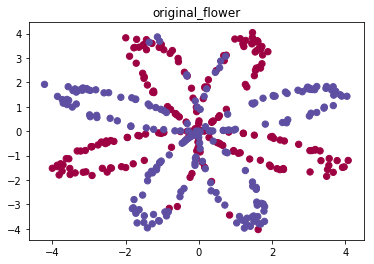

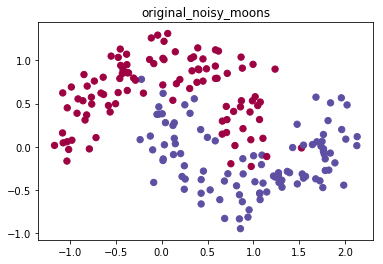

In [2]:
# First Dataset
datas = []
X, Y = load_planar_dataset()
name = 'flower'
X = X.T
Y = Y[0]
datas.append((name, X, Y))

# Second Dataset
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()
datas.append(("noisy_moons", noisy_moons[0], noisy_moons[1]))

# Visualize
for name, X, Y in datas:
    plt.scatter(X[:, 0], X[:, 1], c=Y , s=40, cmap=plt.cm.Spectral);
    plt.title(name+'_original')
    plt.title('original_' + name)
    plt.show()

In [3]:
X_iris = iris.data
Y_iris_true = iris.target

df = pd.DataFrame(iris.data)
folwer_type = {
    0:iris.target_names[0],
    1:iris.target_names[1],
    2:iris.target_names[2],
}
df.columns = iris.feature_names


df['type'] = [folwer_type.get(i) for i in iris.target]
df1 = df[df['type'] == list(folwer_type.values())[0]][:5].copy()
df2 = df[df['type'] == list(folwer_type.values())[1]][:5].copy()
df3 = df[df['type'] == list(folwer_type.values())[2]][:5].copy()
pd.concat([df1, df2, df3])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


# 演算法介紹

# 1. KNN
## (1). 理論

![KNN](./imgs/KNN.jpg)

## (2).KNN的使用

In [4]:
from sklearn.neighbors import KNeighborsClassifier

Accuracy 88.25%


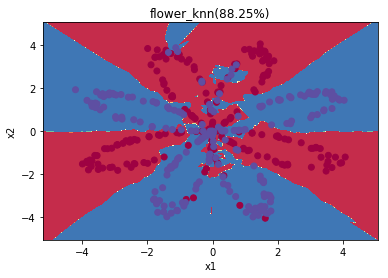

Accuracy 96.0%


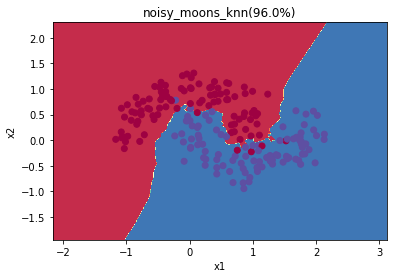

In [5]:
for name, X, Y in datas:
    clf = KNeighborsClassifier(n_neighbors=5)  ## 設定用最近的3個鄰居投票
    clf.fit(X, Y)  ## 訓練模型
    y_pred = clf.predict(X)  ## 預測模型
    print('Accuracy',  str((Y == y_pred).sum()/ X.shape[0]*100)+"%")  ## 計算精準度
    
    plot_decision_boundary(lambda x: clf.predict(x), X.T, Y)  ## 視覺化分類器的分類結果
    plt.title(name+'_knn(' + str((Y == y_pred).sum()/ X.shape[0]*100)+"%)")
    plt.show()

## (3). KNN的練習

In [6]:
#請使用KNeighborsClassifier(n=5)來訓練iris dataset(X_iris, Y_iris_true)
#=============your works starts===============#
knn =
Y_iris_predict =
#==============your works ends================#

print(Y_iris_predict)
print(Counter(Y_iris_predict))
# [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
#  0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1
#  1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
#  2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
#  2 2]


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Counter({2: 51, 0: 50, 1: 49})


In [7]:
#請使用Y_knn與Y_true計算accuracy
#=============your works starts===============#
accuracy =
#==============your works ends================#

print("accuracy", accuracy)
# accuracy 0.9666666666666667

accuracy 0.9666666666666667


In [8]:
# 找出分類錯誤的row_idx
#=============your works starts===============#
fault_idxs =
#==============your works ends================#


fault_idxs

array([ 70,  72,  83, 106, 119], dtype=int64)

In [9]:
# indeices = [num for num, value in enumerate(iris.target != y_pred) if value == True]
folwer_type = {
    0:iris.target_names[0],
    1:iris.target_names[1],
    2:iris.target_names[2],
}
df = pd.DataFrame(iris.data)
df.columns = iris.feature_names
df['type_name'] = [folwer_type.get(i) for i in iris.target]
df['type'] = iris.target
df['yhat'] = Y_iris_predict

print("分類錯誤的row: ")
df.loc[fault_idxs]

分類錯誤的row: 


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type_name,type,yhat
70,5.9,3.2,4.8,1.8,versicolor,1,2
72,6.3,2.5,4.9,1.5,versicolor,1,2
83,6.0,2.7,5.1,1.6,versicolor,1,2
106,4.9,2.5,4.5,1.7,virginica,2,1
119,6.0,2.2,5.0,1.5,virginica,2,1


# 2. Naïve Bayes (貝氏分類器)
## (1). 理論
- 貝式定理: 
    - $P(C|X) = P(X|C)·P(C) / P(X)$：在X條件下C發生的機率
    - $P(C)$：C發生的機率
    - $P(C|X)$：在X條件下C發生的機率
- 解釋: 
    - 10人，3人喜歡看書，5人是女生，是女生且喜歡看書者2人，請問假設已知甲為女生，她喜歡看書的機率是多少?
    - 
    - 
    - 
    - 
    - 
    - 
    - 
    - 
    - 
    - 
    - 
    - 
    - 
    - 
    - 
    - 
    - 
    - 
    - 
    - P(喜歡看書|女)=P(女|喜歡看書)*P(喜歡看書)/P(女)
    - $\frac{woman\&lovereading}{woman} = \frac{woman\&lovereading}{lovereading} \times \frac{lovereading}{all} \times \frac{all}{woman}$
    - P(女|喜歡看書) = P({女}$\cap${喜歡看書})/P(喜歡看書) = 2/3
    - (2/3) * (3/10) / (5/10) = 0.3996
- 資料

In [10]:
print("請預測每個天氣狀況網球賽會不會開打:")
df = pd.read_csv("dataset\\playTennis.csv")
df

請預測每個天氣狀況網球賽會不會開打:


,Outlook,Temperature,Humidity,Windy,play tennis
0,sunny,hot,high,False,N
1,sunny,hot,high,True,N
2,overcast,hot,high,False,P
3,rain,mild,high,False,P
4,rain,cool,normal,False,P
5,rain,cool,normal,True,N
6,overcast,cool,normal,True,P
7,sunny,mild,high,False,N
8,sunny,cool,normal,False,P
9,rain,mild,normal,False,P


被式分類器便是將特定條件底下(X=rain, hot, high, false)，球賽開打的機率$P(p|X)$與球賽沒有開打的機率$P(n|X)$進行比較，根據貝是定理: 
$$P(p|X)=P(X|p)·P(p)/P(X)$$ 
$$P(n|X)=P(X|n)·P(n)/P(X)$$
因為是比較，分母可以忽略，因此請算出$P(X|p)·P(p)$以及$P(X|n)·P(n)$，並進行比較:


In [11]:
# 使用df請計算出:
# 1. 球賽開打的機率: P(Postive)
# 2. 球賽沒有開打的機率: P(Negative)
# 3. 如果球賽開打，是晴天的機率: P(Sunny|Postive)
# 4. 如果球賽沒有開打，是晴天的機率: P(Sunny|Negative)
possibilities = {}
#=============your works starts===============#
possibilities["P(Postive)"] =
possibilities["P(Negative)"] =
possibilities["P(Sunny|Postive)"] =
possibilities["P(Sunny|Negative)"] =
#==============your works ends================#


pprint(possibilities)
# {'P(Negative)': 0.35714285714285715,
#  'P(Postive)': 0.6428571428571429,
#  'P(Sunny|Negative)': 0.6,
#  'P(Sunny|Postive)': 0.2222222222222222}

{'P(Negative)': 0.35714285714285715,
 'P(Postive)': 0.6428571428571429,
 'P(Sunny|Negative)': 0.6,
 'P(Sunny|Postive)': 0.2222222222222222}


c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


可以整理成=>
![basian_table.PNG](./imgs/basian_table.PNG)


$$P(X|p)·P(p)=P(rain, hot, high, false|p)·P(p) $$
$$\thickapprox P(rain|p)·P(hot|p)·P(high|p)·P(false|p)·P(p)$$ 
$$=3/9·2/9·3/9·6/9·9/14=0.010582$$
$$P(X|n)·P(n)=P(rain, hot, high, false|n)·P(n) $$
$$\thickapprox P(rain|n)·P(hot|n)·P(high|n)·P(false|n)·P(n) $$
$$=2/5·2/5·4/5·2/5·5/14=0.018286$$

## (2). 貝氏分類器的使用

In [12]:
from sklearn.naive_bayes import GaussianNB

Accuracy 47.25%


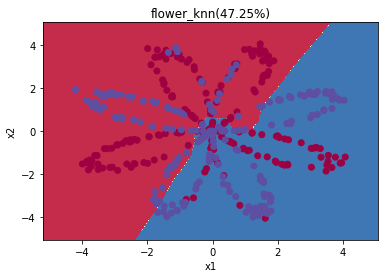

Accuracy 86.5%


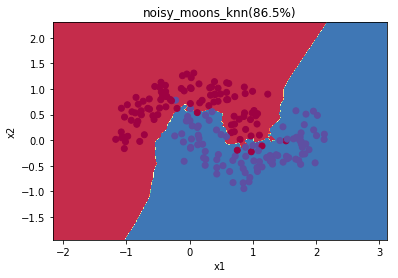

In [13]:
for name, X, Y in datas:
    gnb = GaussianNB()  ## 設定用最近的3個鄰居投票
    gnb.fit(X, Y)  ## 訓練模型
    y_pred = gnb.predict(X)  ## 預測模型
    print('Accuracy',  str((Y == y_pred).sum()/ X.shape[0]*100)+"%")  ## 計算精準度
    
    plot_decision_boundary(lambda x: clf.predict(x), X.T, Y)  ## 視覺化分類器的分類結果
    plt.title(name+'_knn(' + str((Y == y_pred).sum()/ X.shape[0]*100)+"%)")
    plt.show()

## (3). 貝氏分類器的練習

In [14]:
#請使用GaussianNB()來訓練iris dataset
#=============your works starts===============#
gnb =
Y_iris_predict =
#==============your works ends================#

print(Y_iris_predict)
print(Counter(Y_iris_predict))
# [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
#  0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
#  1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
#  2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
#  2 2]

# Counter({0: 50, 1: 50, 2: 50})

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Counter({0: 50, 1: 50, 2: 50})


In [15]:
accuracy = np.sum(Y_iris_true == Y_iris_predict)/len(Y_iris_predict)
print("accuracy", accuracy)

accuracy 0.96


In [16]:
fault_idxs = np.where(Y_iris_true != Y_iris_predict)[0]
folwer_type = {
    0:iris.target_names[0],
    1:iris.target_names[1],
    2:iris.target_names[2],
}
df = pd.DataFrame(iris.data)
df.columns = iris.feature_names
df['type_name'] = [folwer_type.get(i) for i in iris.target]
df['type'] = iris.target
df['yhat'] = Y_iris_predict

print("分類錯誤的row: ")
df.loc[fault_idxs]

分類錯誤的row: 


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type_name,type,yhat
52,6.9,3.1,4.9,1.5,versicolor,1,2
70,5.9,3.2,4.8,1.8,versicolor,1,2
77,6.7,3.0,5.0,1.7,versicolor,1,2
106,4.9,2.5,4.5,1.7,virginica,2,1
119,6.0,2.2,5.0,1.5,virginica,2,1
133,6.3,2.8,5.1,1.5,virginica,2,1


# 3. logistic regression (羅吉斯回歸)
## (1). 理論
- $\hat{y} = \alpha x_{1} + \beta x_{2} + \gamma x_{3}$
- minimize $logloss = - (ylog(\hat{y}) + (1-y)log(1-\hat{y}))$

![Log_vs_neglog](./imgs/Log_vs_neglog.gif)

In [17]:
from sklearn.metrics import log_loss
import numpy as np
print(log_loss([0, 0, 1], [0.0001, 0.0001, 0.9999]))
print(log_loss([0, 0, 1], [0.9999, 0.9999, 0.0001]))

def logloss(y, yhat):
    return -(y)*np.log(yhat)-(1-y)*np.log(1-yhat)
print(logloss(1, 0.9999))
print(logloss(1, 0.0001))


0.00010000500033334734
9.210340371976256
0.00010000500033334732
9.210340371976182


##  (2).羅吉斯回歸的使用

In [18]:
from sklearn.linear_model import LogisticRegressionCV

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Accuracy 47.0%


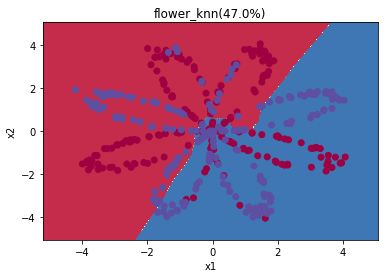

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Accuracy 87.0%


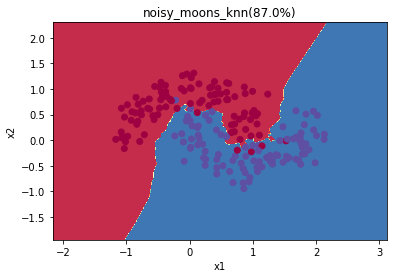

In [19]:
for name, X, Y in datas:
    lgr = LogisticRegressionCV()  ## 設定用最近的3個鄰居投票
    lgr.fit(X, Y)  ## 訓練模型
    y_pred = lgr.predict(X)  ## 預測模型
    print('Accuracy',  str((Y == y_pred).sum()/ X.shape[0]*100)+"%")  ## 計算精準度
    
    plot_decision_boundary(lambda x: clf.predict(x), X.T, Y)  ## 視覺化分類器的分類結果
    plt.title(name+'_knn(' + str((Y == y_pred).sum()/ X.shape[0]*100)+"%)")
    plt.show()

## (3). 羅吉斯回歸分類器的練習

In [20]:
#請使用GaussianNB()來訓練iris dataset
#=============your works starts===============#
lgr =
Y_iris_predict =
#==============your works ends================#

print(Y_iris_predict)
print(Counter(Y_iris_predict))
# [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
#  0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
#  1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
#  2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
#  2 2]
# Counter({2: 51, 0: 50, 1: 49})

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Counter({2: 51, 0: 50, 1: 49})


In [21]:
accuracy = np.sum(Y_iris_true == Y_iris_predict)/len(Y_iris_predict)
print("accuracy", accuracy)

accuracy 0.9666666666666667


In [22]:
fault_idxs = np.where(Y_iris_true != Y_iris_predict)[0]
folwer_type = {
    0:iris.target_names[0],
    1:iris.target_names[1],
    2:iris.target_names[2],
}
df = pd.DataFrame(iris.data)
df.columns = iris.feature_names
df['type_name'] = [folwer_type.get(i) for i in iris.target]
df['type'] = iris.target
df['yhat'] = Y_iris_predict

print("分類錯誤的row: ")
df.loc[fault_idxs]

分類錯誤的row: 


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type_name,type,yhat
70,5.9,3.2,4.8,1.8,versicolor,1,2
77,6.7,3.0,5.0,1.7,versicolor,1,2
83,6.0,2.7,5.1,1.6,versicolor,1,2
119,6.0,2.2,5.0,1.5,virginica,2,1
133,6.3,2.8,5.1,1.5,virginica,2,1


# 4. Decision Tree (決策樹)
## (1). 解釋
以以下資料為例，決策樹便是將下表

| age   | income | student | credit_rating | buys_computer |
|-------|--------|---------|---------------|---------------|
| <=30  | high   | no      | fair          | no            |
| <=30  | high   | no      | excellent     | no            |
| 31…40 | high   | no      | fair          | yes           |
| >40   | medium | no      | fair          | yes           |
| >40   | low    | yes     | fair          | yes           |
| >40   | low    | yes     | excellent     | no            |
| 31…40 | low    | yes     | excellent     | yes           |
| <=30  | medium | no      | fair          | no            |
| <=30  | low    | yes     | fair          | yes           |
| >40   | medium | yes     | fair          | yes           |
| <=30  | medium | yes     | excellent     | yes           |
| 31…40 | medium | no      | excellent     | yes           |
| 31…40 | high   | yes     | fair          | yes           |
| >40   | medium | no      | excellent     | no            |

轉換成...

![decisionTree.JPG](./imgs/decisionTree.JPG)



## (2). 我們應該香將哪一個特徵值拿來分類
- 分類之後能提供較多資訊量者
- 如何量化資訊量的多寡? Entropy(熵) 
- 包含{m1, m2, …,mn}的M訊息的Entropy(熵)計算如下
$$(M) = - \sum\limits_{i=1}^n p(m_{i}) log_{2} p(m_{i})$$

$p(m_i)$指的是$m_i$在M裡面出現的機率
- 舉例來說

![entropy](./imgs/entropy.JPG)

![informationGain](./imgs/informationGain.JPG)

- 因此，Information Gain(資訊增量)可以被定義如下:
$$Before(p, n) = -\frac{p}{p+n} log_{2}(\frac{p}{p+n}) - \frac{n}{p+n} log_{2}(\frac{n}{p+n})$$
$$After(A) = \sum\limits_{i=1}^v -\frac{p_{i} + n_{i}}{p+n} I(p_{i}, n_{i})$$
$$Information Gain = Before(p, n) - After(A)$$

- 假設首先以age進行分類

In [23]:
def entropy(p, n):
    # 請定義出entropy的function，注意若出現0乘上無限大也等於0。
    #=============your works starts===============#
    p_pn =
    n_pn =
    lpp =
    lpn =
    entropy =
    #==============your works ends================#
    return entropy 

print(entropy(0.5, 0.5))
print(entropy(1, 0))
# 1.0
# 0.0

1.0
0.0


In [24]:
df = pd.read_csv(os.path.join("dataset", "buy_computers"))
print(df.columns)
df

Index(['age', 'income', 'student', 'credit_rating', 'buys_computer'], dtype='object')


,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,30…40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,30…40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [25]:
col_candidates = ['age', 'income', 'student', 'credit_rating']

dict_search_1st = {}
for col in col_candidates:
    # 請計算出以個欄位進行groupby的後每個類別的個數，並將其轉換為dict型別
    #=============your works starts===============#
    dict_search_1st[col] =
    #==============your works ends================#

    
pprint(dict_search_1st)
# {'age': {'30…40': 4, '<=30': 5, '>40': 5},
#  'buys_computer': {'no': 5, 'yes': 9},
#  'credit_rating': {'excellent': 6, 'fair': 8},
#  'income': {'high': 4, 'low': 4, 'medium': 6},
#  'student': {'no': 7, 'yes': 7}}

{'age': {'30…40': 4, '<=30': 5, '>40': 5},
 'credit_rating': {'excellent': 6, 'fair': 8},
 'income': {'high': 4, 'low': 4, 'medium': 6},
 'student': {'no': 7, 'yes': 7}}


In [26]:
dict_search_2nd = {}
for col in ['age', 'income', 'student', 'credit_rating']:
    # 請計算出以個「欄位+buys_computer」進行groupby的後每個類別的個數，並將其轉換為dict型別
    #=============your works starts===============#
    dict_search_2nd[col] =
    #==============your works ends================#

    
pprint(dict_search_2nd)
# {'age': {('30…40', 'yes'): 4,
#          ('<=30', 'no'): 3,
#          ('<=30', 'yes'): 2,
#          ('>40', 'no'): 2,
#          ('>40', 'yes'): 3},
#  'credit_rating': {('excellent', 'no'): 3,
#                    ('excellent', 'yes'): 3,
#                    ('fair', 'no'): 2,
#                    ('fair', 'yes'): 6},
#  'income': {('high', 'no'): 2,
#             ('high', 'yes'): 2,
#             ('low', 'no'): 1,
#             ('low', 'yes'): 3,
#             ('medium', 'no'): 2,
#             ('medium', 'yes'): 4},
#  'student': {('no', 'no'): 4,
#              ('no', 'yes'): 3,
#              ('yes', 'no'): 1,
#              ('yes', 'yes'): 6}}

{'age': {('30…40', 'yes'): 4,
         ('<=30', 'no'): 3,
         ('<=30', 'yes'): 2,
         ('>40', 'no'): 2,
         ('>40', 'yes'): 3},
 'credit_rating': {('excellent', 'no'): 3,
                   ('excellent', 'yes'): 3,
                   ('fair', 'no'): 2,
                   ('fair', 'yes'): 6},
 'income': {('high', 'no'): 2,
            ('high', 'yes'): 2,
            ('low', 'no'): 1,
            ('low', 'yes'): 3,
            ('medium', 'no'): 2,
            ('medium', 'yes'): 4},
 'student': {('no', 'no'): 4,
             ('no', 'yes'): 3,
             ('yes', 'no'): 1,
             ('yes', 'yes'): 6}}


we can sort it out like this

| age     | count | p_count | n_count |
|---------|-------|---------|---------|
| <=30    | 5     | 2       | 3       |
| 30...40 | 4     | 4       | 0       |
| >40     | 5     | 3       | 2       |

In [27]:
# 請計算原始的entropy
#=============your works starts===============#
col =
dict_gb_bc =
entropy_ori =
#==============your works ends================#

print(entropy_ori)
# 0.9402859586706311

0.9402859586706311


In [28]:
def cal_entropy_2nd(dict_search_2nd_target, col):
    # 計算用「特定欄位+buys_computer」(e.g. age+buys_computer)分類後，
    # 第一順位欄位為特定值(e.g. "30…40")時的entropy
    #=============your works starts===============#
    entropy_out =
    #==============your works ends================#
    return entropy_out

entropy_dict = {}
for col in col_candidates:
    # 計算用特定欄位進行分類後的entropy(要考量資料的count作為weight)
    # 並計算information gain
    #=============your works starts===============#
    entropy_for_each_category =
    weights_for_each_category =
    entropy_classfied =
    inf_gain =
    #==============your works ends================#
    print(col, inf_gain)


age 0.24674981977443922
income 0.02922256565895487
student 0.1518355013623417
credit_rating 0.04812703040826949


## (3). 決策樹的使用

In [29]:
from sklearn.tree import DecisionTreeClassifier  ## decision tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

Accuracy 100.0%


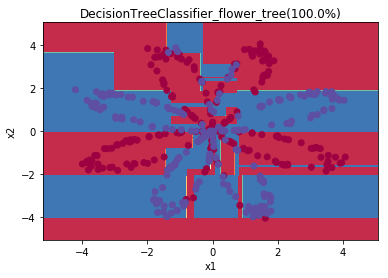

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy 99.0%


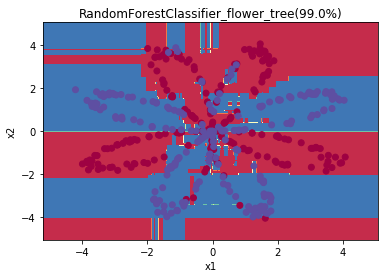

Accuracy 81.25%


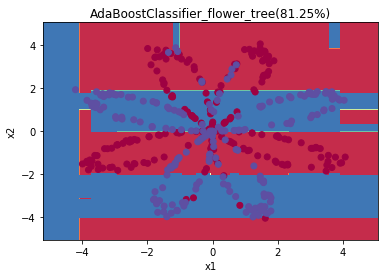

Accuracy 91.25%


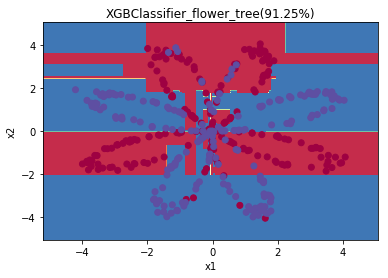

Accuracy 100.0%


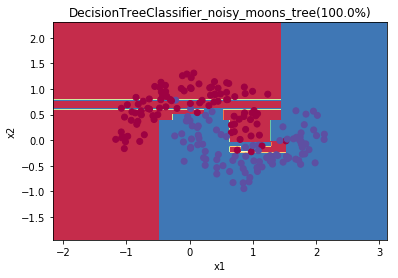

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy 98.5%


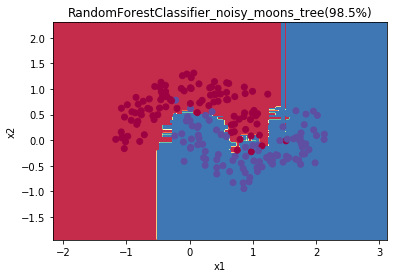

Accuracy 100.0%


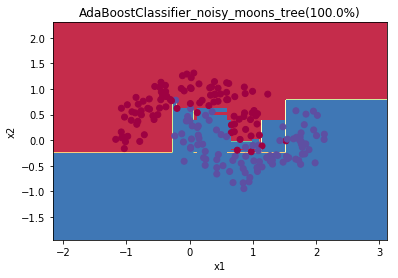

Accuracy 97.5%


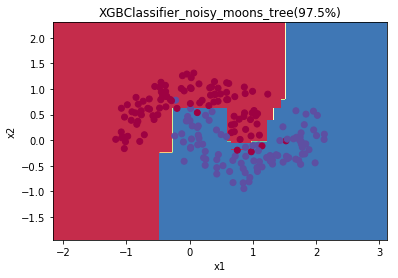

In [30]:
clfs={
"DecisionTreeClassifier":DecisionTreeClassifier,
"RandomForestClassifier":RandomForestClassifier,
"AdaBoostClassifier":AdaBoostClassifier,
"XGBClassifier":XGBClassifier
}
for name, X, Y in datas:
    for clf_name, clf in clfs.items():
        clf = clf()
        clf.fit(X, Y)

        y_pred = clf.predict(X)
        print('Accuracy',  str((Y == y_pred).sum()/ X.shape[0]*100)+"%")
        plot_decision_boundary(lambda x: clf.predict(x), X.T, Y)
        plt.title(clf_name + "_" + name +'_tree(' + str((Y == y_pred).sum()/ X.shape[0]*100)+"%)")
        plt.show()

## (4). 決策樹的練習

In [31]:
#請使用XGBClassifier()來訓練iris dataset
#=============your works starts===============#
xgb =
Y_iris_predict =
#==============your works ends================#

print(Y_iris_predict)
print(Counter(Y_iris_predict))
# [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
#  0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
#  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
#  2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
#  2 2]
# Counter({0: 50, 1: 50, 2: 50})

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Counter({0: 50, 1: 50, 2: 50})


In [32]:
accuracy = np.sum(Y_iris_true == Y_iris_predict)/len(Y_iris_predict)
print("accuracy", accuracy)

accuracy 1.0


In [33]:
fault_idxs = np.where(Y_iris_true != Y_iris_predict)[0]
folwer_type = {
    0:iris.target_names[0],
    1:iris.target_names[1],
    2:iris.target_names[2],
}
df = pd.DataFrame(iris.data)
df.columns = iris.feature_names
df['type_name'] = [folwer_type.get(i) for i in iris.target]
df['type'] = iris.target
df['yhat'] = Y_iris_predict

print("分類錯誤的row: ")
df.loc[fault_idxs]

分類錯誤的row: 


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type_name,type,yhat


# 5. SVM (支持向量機)
## (1). 理論
- 基礎
![SVM](./imgs/SVM.png)

- Error term(Penalty)

![SVM_error](./imgs/SVM_error.png)

- 非線性可分

![SVM_nonLinear](./imgs/SVM_nonLinear.png)

![SVM_highdim](./imgs/SVM_highdim.png)



## (2). 參數
- C : float, optional (default=1.0)
    - 錯誤懲罰項
- kernel : string, optional (default='rbf')
    - 決定分隔線的函數: 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'或是自定義函數
- degree : int, optional (default=3)
    - polynomial(‘poly’)分隔函數的degree，如果使用其他分隔函數將直接被忽略。
- gamma : float, optional (default=’auto’)
    - 'rbf', 'poly' and 'sigmoid'的共變異數. 如果gamma是'auto'則預設為 1/n_features。

## (3). SVM的使用

In [34]:
from sklearn.svm import SVC

Accuracy 47.5%


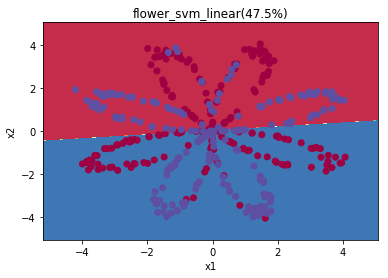

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy 79.5%


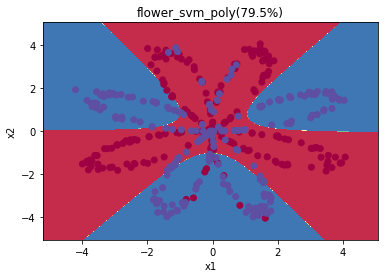

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy 84.0%


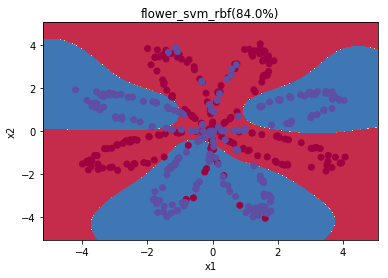

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy 34.25%


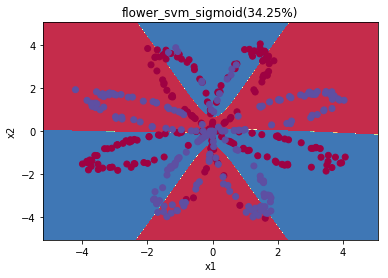

Accuracy 86.0%


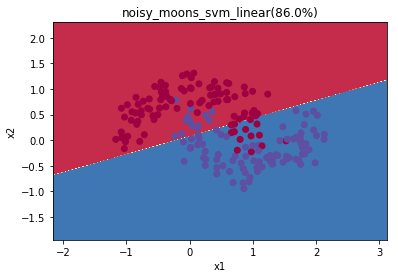

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy 80.5%


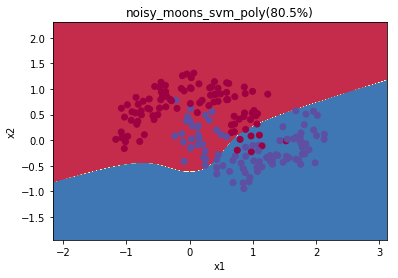

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy 92.5%


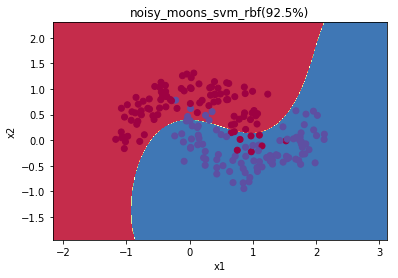

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy 77.0%


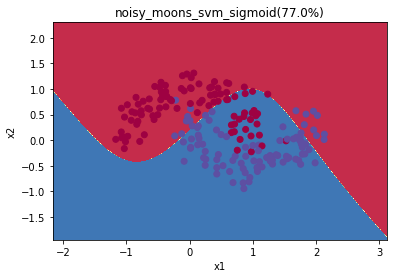

In [35]:
kernels =['linear', 'poly', 'rbf', 'sigmoid']  ## 選擇kernel
for name, X, Y in datas:
    for k in kernels:
        clf = SVC(C=1.0, kernel=k)  ## 這邊大家可以調整懲罰項C試試看
        clf.fit(X, Y)

        y_pred = clf.predict(X)
        print('Accuracy',  str((Y == y_pred).sum()/ X.shape[0]*100)+"%")

        plot_decision_boundary(lambda x: clf.predict(x), X.T, Y)
        plt.title(name+'_svm_'+ k +'(' + str((Y == y_pred).sum()/ X.shape[0]*100)+"%)")
        plt.show()

## (4). SVM的練習

In [36]:
#請使用SVC(C=1.0, kernel='rbf')來訓練iris dataset
#=============your works starts===============#
svm =
Y_iris_predict =
#==============your works ends================#

print(Y_iris_predict)
print(Counter(Y_iris_predict))
# [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
#  0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
#  1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
#  2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
#  2 2]
# Counter({2: 52, 0: 50, 1: 48})

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Counter({2: 52, 0: 50, 1: 48})


c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [37]:
accuracy = np.sum(Y_iris_true == Y_iris_predict)/len(Y_iris_predict)
print("accuracy", accuracy)

accuracy 0.9866666666666667


In [38]:
fault_idxs = np.where(Y_iris_true != Y_iris_predict)[0]
folwer_type = {
    0:iris.target_names[0],
    1:iris.target_names[1],
    2:iris.target_names[2],
}
df = pd.DataFrame(iris.data)
df.columns = iris.feature_names
df['type_name'] = [folwer_type.get(i) for i in iris.target]
df['type'] = iris.target
df['yhat'] = Y_iris_predict

print("分類錯誤的row: ")
df.loc[fault_idxs]

分類錯誤的row: 


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type_name,type,yhat
77,6.7,3.0,5.0,1.7,versicolor,1,2
83,6.0,2.7,5.1,1.6,versicolor,1,2
